<div class="alert alert-info">
Привет, Ольга! Меня зовут Светлана Чих и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

<div class="alert alert-success">
<b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
</div>
<div class="alert alert-info">
<b>👂 Совет:</b> Какие-то дополнительные материалы
</div>
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
 </div>

# Сборный проект —2: HR аналитика

## Описание проекта
Позади много уроков и заданий, и закрепить свои знания, как обычно, вы сможете в самостоятельном проекте. Это непростой проект, в котором от вас потребуется больше самостоятельности. Этапы работы описаны кратко, и вам понадобится декомпозировать задачи, то есть разделить их на более мелкие. Опирайтесь на знания об этапах анализа данных и машинного обучения из прошлых курсов.

Перейдём к задаче. HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 
У вас будет несколько задач. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

## План работы

Ознакомиться с данными, выявить пропуски и аномалии.

Выполнить предобработку данных: переименование столбцов, замена типов данных, заполнение пропусков, устранение дубликатов

Выполнить исследовательский анализ: построить графики, найти аномалии, понять как распределены данные. Учесть, что данные есть категориальные и количественные. 

Подготовить данные для пайплайна, обучить модели: линейную и дерево решений. 

Решить первую задачу : предсказать уровень удовлетворенности.

Решить вторую задачу: предсказать увольнение сотрудника из компании.

Сделать выводы и оформить проект.



In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
# обновление, иначе получаю кучу ошибок
!pip install scikit-learn --upgrade

In [3]:
!pip install shap --upgrade

<div class="alert alert-success">
<b>👍 Успех:</b> Установлены и обновлены нужные модули!
</div>

## Загрузка данных

In [5]:
# импортируем нужные нам библиотеки
import pandas as pd
import shap
from phik import phik_matrix
from phik.report import plot_correlation_matrix
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score,
    mean_absolute_error,
    mean_squared_error,
    make_scorer,
    roc_auc_score
)

# загружаем нужные классы
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# класс для работы с пропусками
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# отключаем предупреждения
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-success">
<b>👍 Успех:</b> Импортированы нужные библиотеки!
</div>

In [6]:
train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
y_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
X_test = pd.read_csv('/datasets/test_features.csv')

In [7]:
# функция, чтобы узнать информацию о данных
def df_info(df):
    # размер датасета
    print('Размер датафрейма:',df.shape)
    # посмотрим первые 5 строк данных
    print('Первые 5 строк:')
    display(df.head())
    print('Последние 5 строк:')
    display(df.tail())
    # тип данных
    print('Описательные статистики:')
    display(df.describe())
    print('Типы данных')
    display(df.info())

In [8]:
print(df_info(train),df_info(X_test),df_info(y_test ))

Размер датафрейма: (4000, 10)
Первые 5 строк:


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


Последние 5 строк:


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
3995,457950,technology,junior,high,2,no,no,3,46800,0.45
3996,957499,sales,junior,medium,2,no,no,4,21600,0.68
3997,533318,sales,middle,low,7,no,no,5,24000,0.76
3998,706868,sales,junior,medium,2,no,no,3,24000,0.48
3999,338347,technology,middle,medium,5,no,yes,1,44400,0.18


Описательные статистики:


,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

Размер датафрейма: (2000, 9)
Первые 5 строк:


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Последние 5 строк:


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400
1999,771859,purchasing,middle,medium,1,no,no,4,38400


Описательные статистики:


,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

Размер датафрейма: (2000, 2)
Первые 5 строк:


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Последние 5 строк:


,id,job_satisfaction_rate
1995,405257,0.28
1996,370925,0.21
1997,857722,0.39
1998,303402,0.26
1999,648995,0.62


Описательные статистики:


,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

None None None


**Вывод:**

Мы прочитали данные, посмотрели на 5 первых и последних строк в датасетах. Получили описательные статистики.

   На данном этапе видно, что есть пропуски в столбцах dept,level тренировочной и тестовой выборки, заполнять их будем на шаге пайплайна; типы данных соответствуют.
   
   
  Наименования столбцов соответствуют змеиному регистру.
   

<div class="alert alert-success">
<b>👍 Успех:</b> Датасеты загружены и просмотрены!
</div>

## Предобработка данных

In [9]:
fа

sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64

In [10]:
#проверим значения категориальных столбцов
train['level'].value_counts()

junior    1894
middle    1744
sinior     358
Name: level, dtype: int64

In [11]:
#исправим опечатку
train['level'] = train['level'].replace('sinior', 'senior')

In [12]:
#проверим значения категориальных столбцов
train['workload'].value_counts()

medium    2066
low       1200
high       734
Name: workload, dtype: int64

In [13]:
#проверим значения категориальных столбцов
train['last_year_promo'].value_counts()

no     3880
yes     120
Name: last_year_promo, dtype: int64

In [14]:
train['last_year_violations'].value_counts()

no     3441
yes     559
Name: last_year_violations, dtype: int64

In [15]:
#проверим значения категориальных столбцов
X_test['dept'].value_counts()

sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64

In [16]:
#проверим значения категориальных столбцов
X_test['level'].value_counts()

junior    974
middle    854
sinior    171
Name: level, dtype: int64

In [17]:
#исправим опечатку
X_test['level'] = X_test['level'].replace('sinior', 'senior')

In [18]:
#проверим значения категориальных столбцов
X_test['last_year_promo'].value_counts()

no     1937
yes      63
Name: last_year_promo, dtype: int64

In [19]:
#проверим значения категориальных столбцов
X_test['last_year_violations'].value_counts()

no     1738
yes     262
Name: last_year_violations, dtype: int64

Все значения корректные, неявных дублей и опечаток среди категориальных значений нет.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [20]:
l = [train, X_test, y_test]
for i in l:
     print( 'Количество дублей в датасете:', i.duplicated().sum())

Количество дублей в датасете: 0
Количество дублей в датасете: 0
Количество дублей в датасете: 0


In [21]:
# отсортируем тестовые данные по ид
X_test = X_test.sort_values(by='id').reset_index(drop=True)

y_test = y_test.sort_values(by='id').reset_index(drop=True)


In [22]:
# пропуски в тестовых данных заполним np.nan
X_test.loc[X_test['dept'] == ' ', 'dept'] = np.nan
X_test.loc[X_test['level'] == ' ', 'level'] = np.nan

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Фактически это пропуск
</div>

**Вывод:**

Дубликатов в данных нет.

В датасетах  с типами данных все в порядке, менять не требуется.

 Я просмотрела содержимое категориальных столбцов, все значения в норме: нет ошибок и неявных дублей

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

##  Исследовательский анализ данных

In [23]:
# функция для построения гистограммы и ящика с усами

def hist_box(data,col):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    #гистограмма
    sns.histplot(data = data, x = col, ax=axes[0], bins=50,kde=True)
    axes[0].set_title('гистограмма')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('колво')
    #ящик с усами
    sns.boxplot(data = data, x=col, ax=axes[1])
    axes[1].set_title('диаграмма размаха')
    fig.suptitle(col)
    plt.show()
    


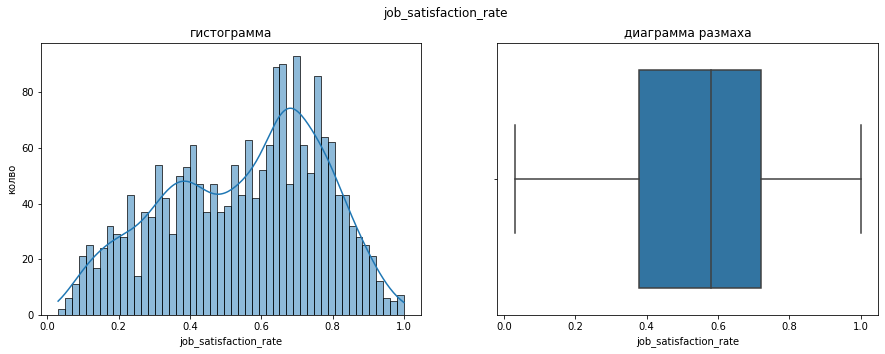

In [24]:
hist_box(y_test,'job_satisfaction_rate')

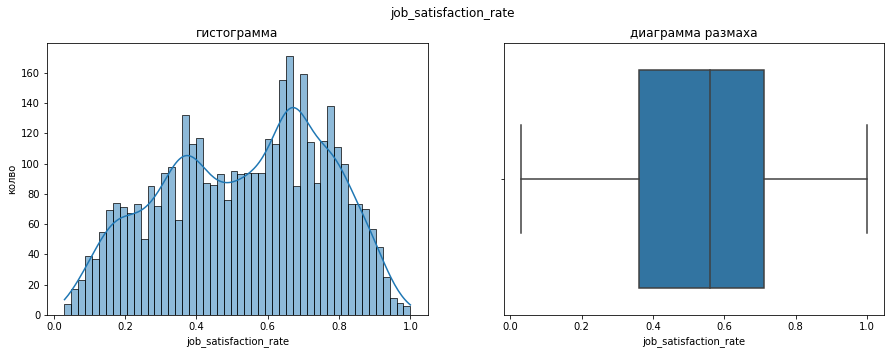

In [25]:
hist_box(train,'job_satisfaction_rate')

Распределение целевого признака без выбросов и аномалий, имеет два пика на 0.4 и 0.7

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

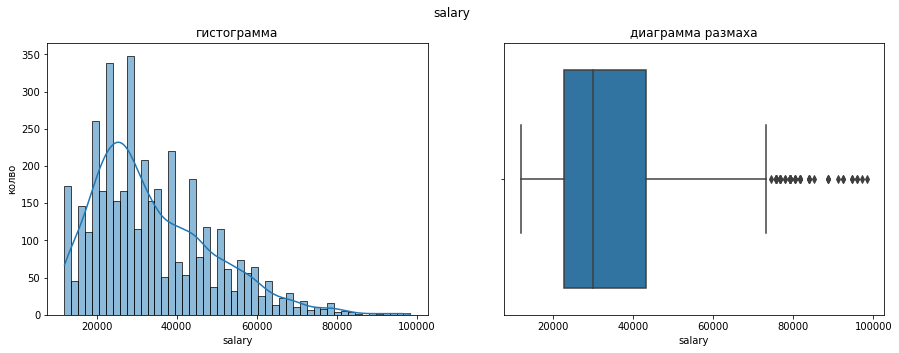

In [26]:
hist_box(train,'salary')


зарплата на тренировочной выборке имеет нормальное распредление скошенное вправа, к выбросам согласно диаграмме размаха можно отнести зп более 75000

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

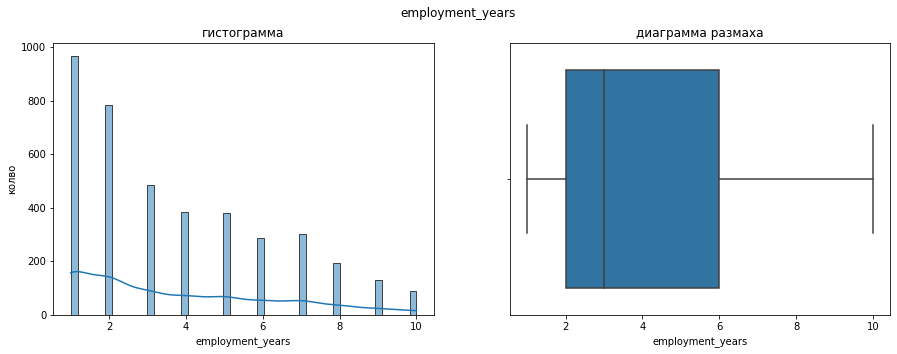

In [27]:
hist_box(train,'employment_years')



На Тренировочных данных видим, что чаще всего длительность работы в компании составляет один год.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

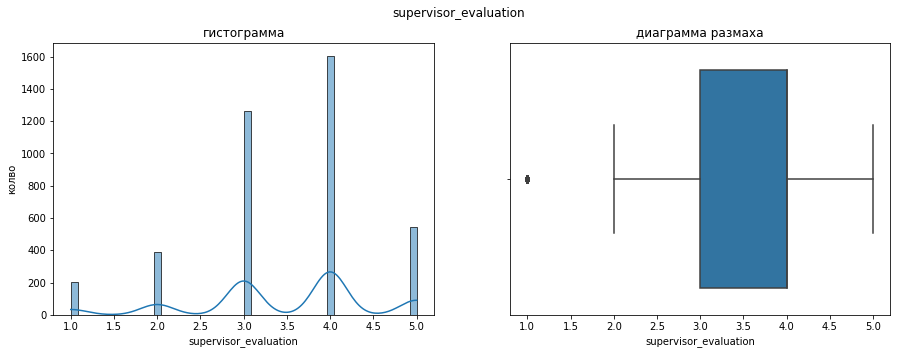

In [28]:
hist_box(train,'supervisor_evaluation')

На тренировочных данных руководители чаще всего оценивают работу сотрудника как "хорошо" (4). Реже - 3.

Оценка 1 бывает реже всего

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

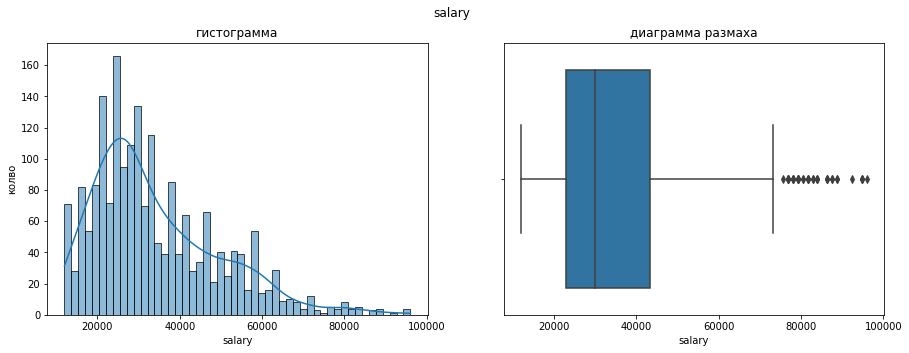

In [29]:
hist_box(X_test,'salary')

График зарплаты на тестовых данных схож с тренировочным:  нормальное распредление скошенное вправо, к выбросам согласно диаграмме размаха можно отнести зп более 75000

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

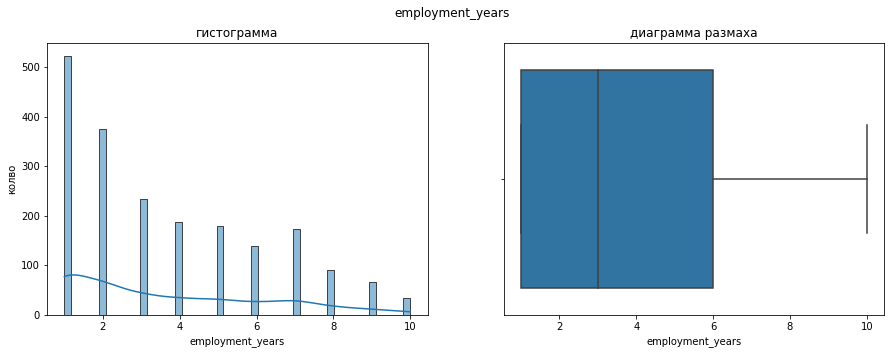

In [30]:
# тестовые данные
hist_box(X_test,'employment_years')

Среднее значение длительности работы в компании чуть выше на тренировочных данных. В целом также чаще всего длительность составляет 1-2 года

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

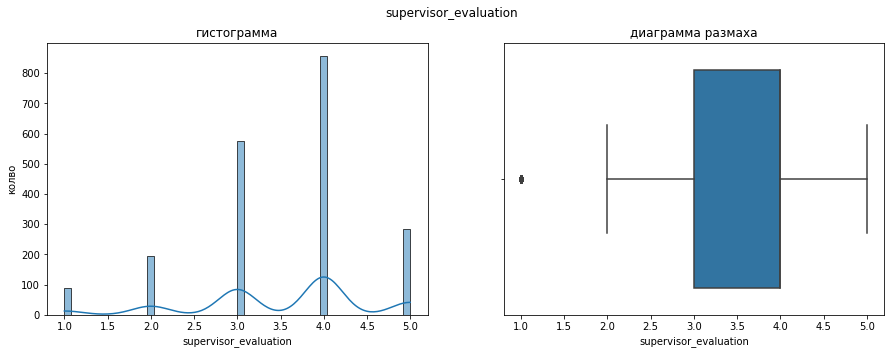

In [31]:

hist_box(X_test,'supervisor_evaluation')

На тестовых данных руководители чаще всего оценивают работу сотрудника как "хорошо" (4). Реже - 3.

Оценка 1 бывает реже всего

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

Посмотрим, как распределились категориальные признаки

In [32]:
# запишем категориальные признаки тренировочной выборки
cat_cols = train.select_dtypes(include = 'object').columns

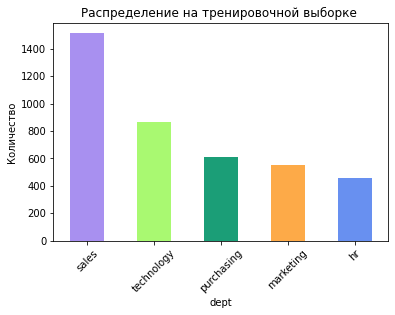

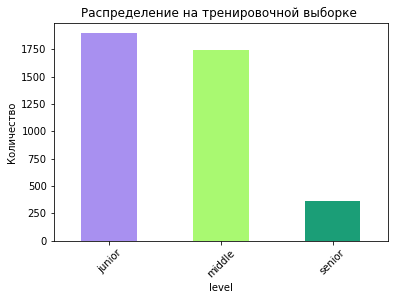

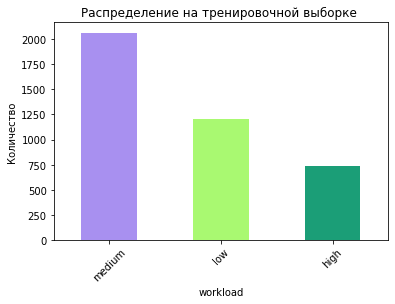

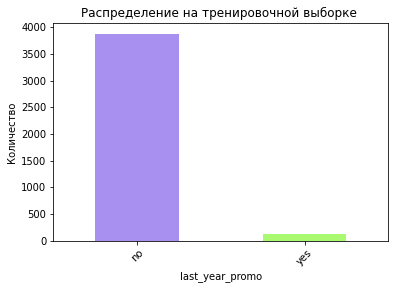

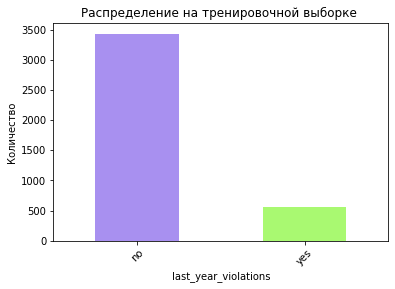

In [33]:
for col in cat_cols:
    fig, ax = plt.subplots()
    colors = [ '#A890F0', '#a9f971','#1b9e77', '#fdaa48','#6890F0']
    train[col].value_counts().plot.bar(color=colors, ax=ax);
    plt.title('Распределение на тренировочной выборке ')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.show()
    
    

In [34]:
# построим графики для тестового набора
# запишем категориальные признаки тренировочной выборки
cat_cols = X_test.select_dtypes(include = 'object').columns

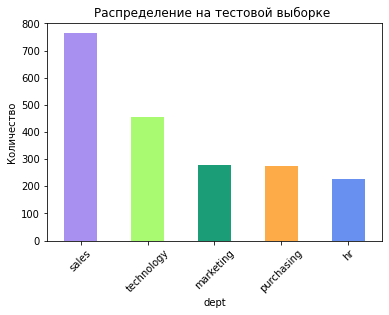

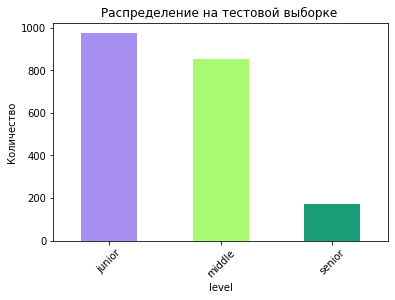

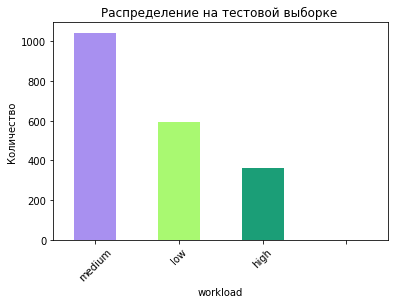

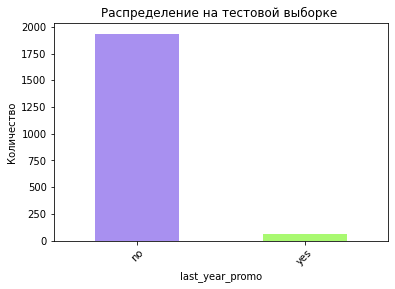

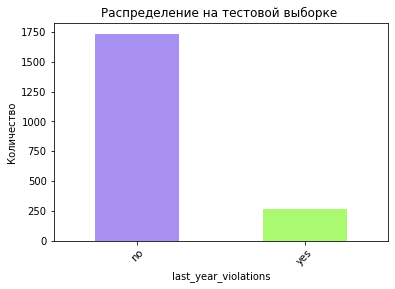

In [35]:
for col in cat_cols:
    fig, ax = plt.subplots()
    colors = [ '#A890F0', '#a9f971','#1b9e77', '#fdaa48','#6890F0']
    X_test[col].value_counts().plot.bar(color=colors, ax=ax);
    plt.title('Распределение на тестовой выборке ')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.show()

Я построила графики распределения для категориальных признаков тестовой и тренирочной выборок. Данные похожи, что будет хорошо  для модели.

На графиках по отделам видим, что большинство работают в продажах, а меньше всего сотрудников HR.

Распределение уровня должности: больше всего джунов, а сеньоры составяляют примерно одну десятую от общего кол-ва сотрудников.

Также чаще всего сотрудники имеют среднюю нагрузку, высокая нагрузка у меньшинства.

Очень мало сотрудников получали повышение за последний год (около 3%) как и тренировочной, так и в тестовой выборках.

Гораздо чаще чем получение повышение сотрудники совершали нарушения)Около 12% сотрудников в обоих наборах данных совершили нарушение.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Что на этих графиках? Если есть какие то визуализации, значит после них долдны быть какие то выводы)))</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента: </b>Исправлено</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Не забывай про выводы, они долны быть после графиков, после каждого раздела, и в конце итоговый вывод
</div>

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


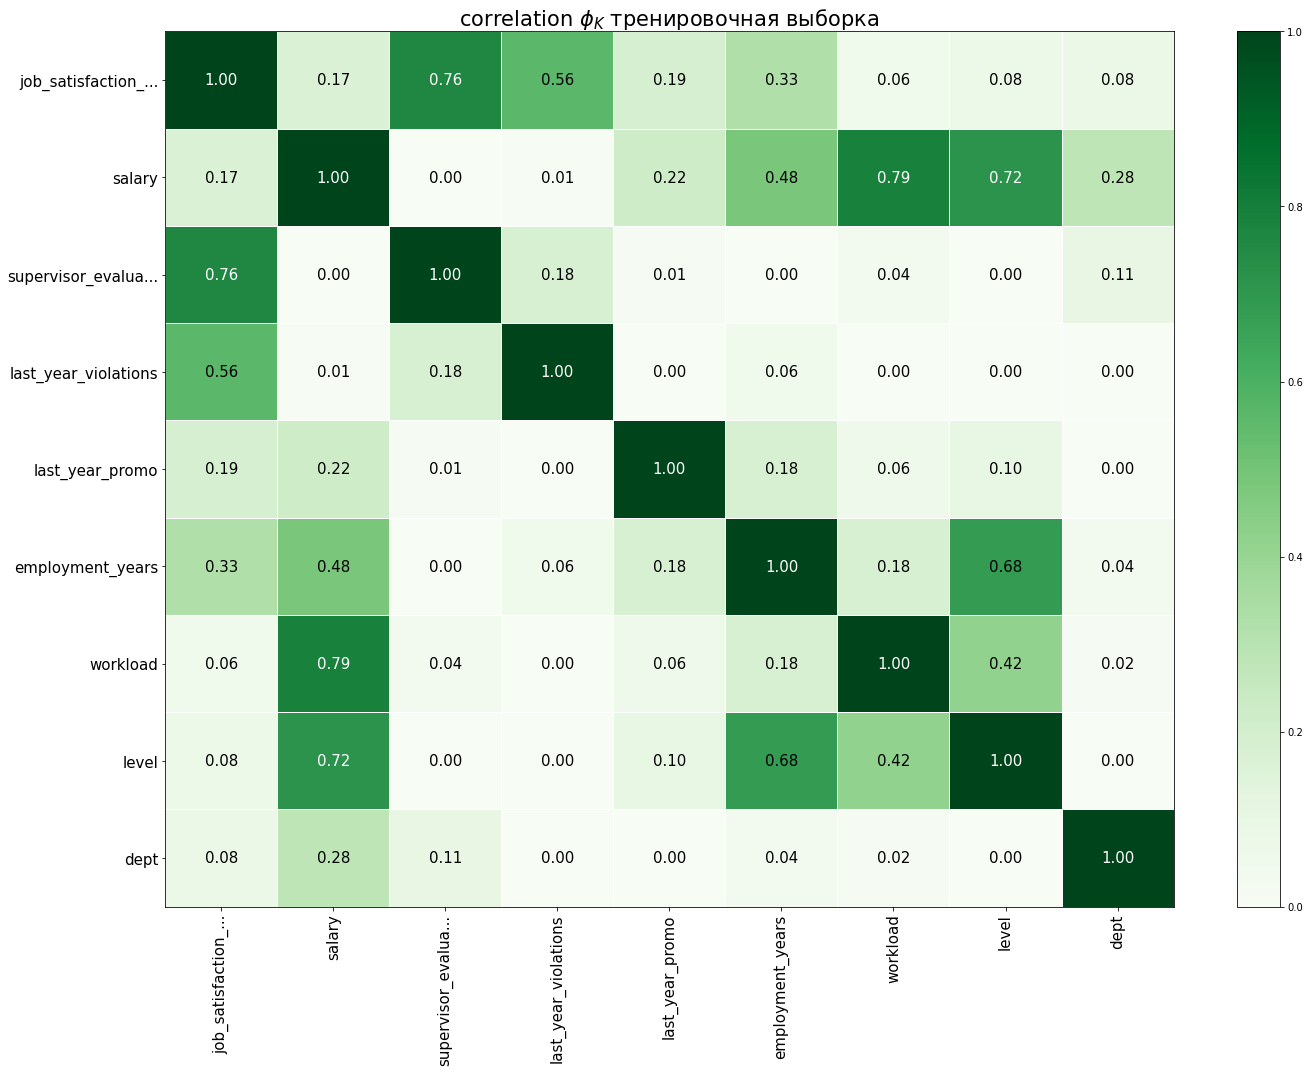

In [36]:
# проверим мультиколинеарность с помощью phik на тренировочных данных

# считаем корреляции на тренировочной выборке
phik_overview = phik_matrix(train.drop('id', axis=1))
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$ тренировочная выборка',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> id не является признаком и не должен попадать в анализ корреляции (ниже тоже нужно исправить)</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> исправила</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary']


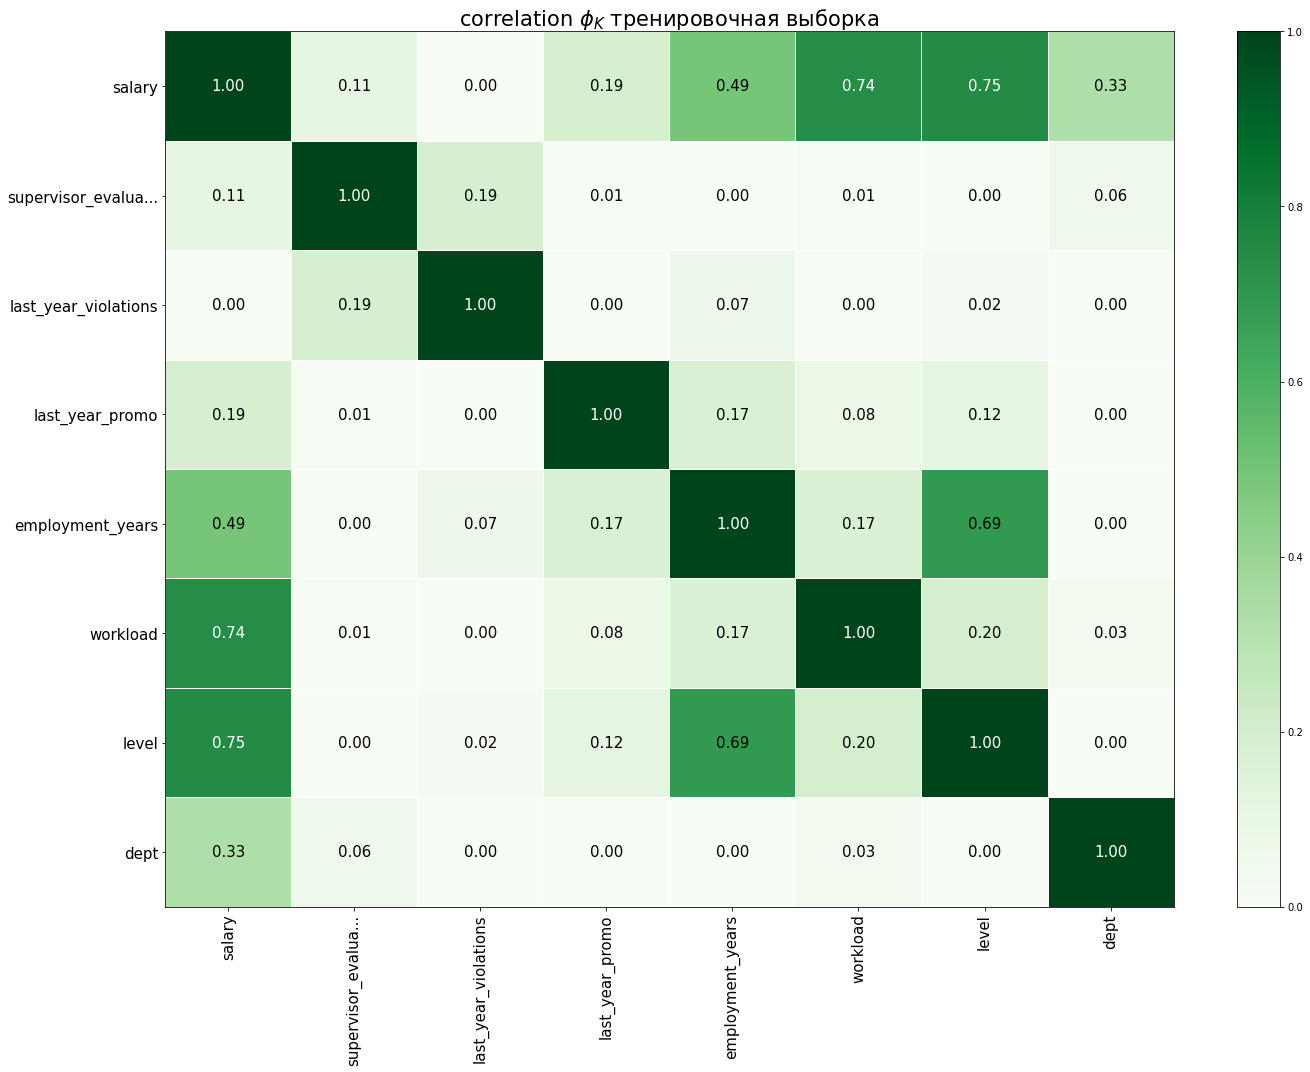

In [37]:
# проверим мультиколинеарность с помощью phik на тестовых данных

# считаем корреляции на тестовой выборке
phik_overview = phik_matrix(X_test.drop('id', axis=1))
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$ тренировочная выборка',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

И на тестовом, и на тренировочном наборе нет показателей более 0.8, значит, нет сильной связи между признаками, мультиколинеарность отсутствует.

вывод:

в целом по всем графикам ситуации с тестовой и тренировочной выборками похожи:

зарплата имеет нормальное распределение скошенное вправо, большинство сотрудников работают год, руководитель хорошо оценивает работу сотрудника.

По категориальным признакам: больше всего сотрудников в продажах, джунов, со средней загрузкой.

Крайне мало сотрудников получали повышение в прошлом году, нарушение тд тоже происходит нечасто.

С помощью phik- матрицы я проверила данные на мультиколинеарность, она не была обнаружена. 



<div class="alert alert-success">
<b>👍 Успех:</b> Хороший корреляционный анализ!
</div>

## Подготовка данных

Подготовку признаков выполните в пайплайне, дополнив пайплайн шага предобработки. При кодировании учитывайте особенности признаков и моделей и используйте как минимум два кодировщика.

In [38]:
# введем константы
TEST_SIZE = 0.25
RANDOM_STATE = 42


In [39]:
# удалям ид
train = train.drop('id', axis=1)
# посмотрим дубликаты
train.duplicated().sum()


245

In [40]:
c#удалим дубликаты
train = train.drop_duplicates() 
# создание тренировочной выборки входных признаков и целевого признака
X_train = train.drop('job_satisfaction_rate', axis=1)
y_train = train['job_satisfaction_rate']
X_test = X_test.drop('id', axis=1)
y_test = y_test['job_satisfaction_rate']

In [41]:
# создаём списки с названиями признаков

ohe_columns = ['last_year_promo', 'last_year_violations','dept']
ord_columns = ['level','workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']


In [42]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))
    ]
    )

In [43]:
# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low','medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

In [44]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)


In [45]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

In [46]:
from scipy.stats import randint
param_distributions = [
     {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth':list(np.arange(10, 100, step=10)) + [None],
        'models__min_samples_split': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }, 
       # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
] 

## Обучение моделей

### Задача 1: предсказание уровня удовлетворённости сотрудника

In [47]:
# для своей  новой метрики — SMAPE
def smape_score(y_true, y_pred):
    return 100/len(y_true) * np.sum(np.abs(y_true-y_pred)/((np.abs(y_true) + np.abs(y_pred))/2))

smape_scorer = make_scorer(smape_score, greater_is_better = False)

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [48]:
#поиск оптимальной модели с перебором гиперпараметров
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_distributions, 
    cv=5, 
    scoring=smape_scorer , 
    n_jobs=-1, 
)

#обучение модели на тренировочной выборке
grid.fit(X_train, y_train);

In [49]:
# используем минус перед моделью из-за greater_is_better = False в метрике
print('Метрика smape score для лучшей модели:\n', -grid.best_score_) 

Метрика smape score для лучшей модели:
 15.03490529752231


In [50]:
print('Лучшая модель и её параметры:\n\n',grid.best_estimator_)
print ('Метрика smape лучшей модели на тренировочной выборке:', -grid.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['last_year_promo',
                                                   'last_year_violations',
                                                   'dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy=

In [51]:
y_pred = grid.predict(X_test)
y_true = y_test
print(f'Метрика smape на тестовой выборке: {round(smape_score(y_true, y_pred), 2)}')

Метрика smape на тестовой выборке: 13.59


Так как под критерием успеха мы принимаем Критерий успеха: SMAPE ≤ 15 на тестовой выборке, то можно считать текущую модель подходящей.


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Нужная метрика достигнута!
</div>

Вывод:
    
    На этом шаге была написана функция для собственной метрики - smape score. Я обучила модели и для перебора гиперпараметров использовала GridSearchCV.
    
    Лучшей моделью оказалась - DecisionTreeRegressor с параметрами: max_depth=20, min_samples_split=8, random_state=42.
    
    На тренировочных данных значение метрики равно 15.03, на тестовых - 13.59
    
    Можно считать задачу успешно выполненной, так как смогли достигнуть метрики менее 15

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Задача 2: предсказание увольнения сотрудника из компании
#### Шаг 1. Загрузка данных
Целевой признак это quit — увольнение сотрудника из компании.

In [52]:

train_2 = pd.read_csv('/datasets/train_quit.csv')
X_test_2 = pd.read_csv('/datasets/test_features.csv')
y_test_2 = pd.read_csv('/datasets/test_target_quit.csv')

In [53]:
print(df_info(train_2),df_info(X_test_2),df_info(y_test_2))

Размер датафрейма: (4000, 10)
Первые 5 строк:


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


Последние 5 строк:


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no
3999,853842,sales,junior,medium,2,no,no,3,27600,yes


Описательные статистики:


,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

Размер датафрейма: (2000, 9)
Первые 5 строк:


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Последние 5 строк:


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400
1999,771859,purchasing,middle,medium,1,no,no,4,38400


Описательные статистики:


,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

Размер датафрейма: (2000, 2)
Первые 5 строк:


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


Последние 5 строк:


,id,quit
1995,836109,yes
1996,180999,yes
1997,746018,no
1998,247658,no
1999,460332,yes


Описательные статистики:


,id
count,2000.000000
mean,552765.213500
std,253851.326129
min,100298.000000
25%,339052.000000
50%,550793.000000
75%,765763.750000
max,999029.000000


Типы данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

None None None


**Вывод:**

Мы прочитали данные, посмотрели на 5 первых и последних строк в датасетах. Получили описательные статистики.

   На данном этапе видно, что есть пропуски в столбцах dept,level  тестовой выборки,
   типы данных соответствуют.
   
   
  Наименования столбцов соответствуют змеиному регистру.

<div class="alert alert-success">
<b>👍 Успех:</b> Датасеты загружены и просмотрены!
</div>

#### Предобработка данных

In [54]:
#проверим значения категориальных столбцов
# запишем категориальные признаки тренировочной выборки
cat_cols_train = train_2.select_dtypes(include = 'object').columns
for col in cat_cols:
    print(col,':')
    print(train_2[col].value_counts())

dept :
sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64
level :
junior    1949
middle    1694
sinior     357
Name: level, dtype: int64
workload :
medium    2118
low       1208
high       674
Name: workload, dtype: int64
last_year_promo :
no     3887
yes     113
Name: last_year_promo, dtype: int64
last_year_violations :
no     3455
yes     545
Name: last_year_violations, dtype: int64


In [55]:
#исправим опечатку
train_2['level'] = train_2['level'].replace('sinior', 'senior')

In [56]:
#проверим значения категориальных столбцов
# запишем категориальные признаки тренировочной выборки
cat_cols_test = X_test_2.select_dtypes(include = 'object').columns
for col in cat_cols:
    print(col,':')
    print(X_test_2[col].value_counts())

dept :
sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64
level :
junior    974
middle    854
sinior    171
Name: level, dtype: int64
workload :
medium    1043
low        593
high       363
             1
Name: workload, dtype: int64
last_year_promo :
no     1937
yes      63
Name: last_year_promo, dtype: int64
last_year_violations :
no     1738
yes     262
Name: last_year_violations, dtype: int64


In [57]:
#исправим опечатку
X_test_2['level'] = X_test_2['level'].replace('sinior', 'senior')

In [58]:
y_test_2['quit'].value_counts()

no     1436
yes     564
Name: quit, dtype: int64

In [59]:
l = [train_2, X_test_2, y_test_2]
for i in l:
     print( 'Количество дублей в датасете:', i.duplicated().sum())

Количество дублей в датасете: 0
Количество дублей в датасете: 0
Количество дублей в датасете: 0


In [60]:
# отсортируем тестовые данные по ид
X_test_2 = X_test_2.sort_values(by='id').reset_index(drop=True)

y_test_2 = y_test_2.sort_values(by='id').reset_index(drop=True)

y_test_2

,id,quit
0,100298,no
1,100480,no
2,100503,no
3,100610,no
4,100692,no
...,...,...
1995,997290,no
1996,998548,yes
1997,998762,yes
1998,998900,no


In [61]:
# пропуски в тестовых данных заполним np.nan
X_test_2.loc[X_test_2['dept'] == ' ', 'dept'] = np.nan
X_test_2.loc[X_test_2['level'] == ' ', 'level'] = np.nan

**Вывод:**

Дубликатов в данных нет.

В датасетах  с типами данных все в порядке, менять не требуется.

 Я просмотрела содержимое категориальных столбцов, почти все значения в норме: исправила ошибку в уровне должности (sinior-senior)других ошибок и неявных дублей нет.
 
 Пропуски в тестовых данных я заполнила с помощью np.nan и отсортировала по ид для дальнейшей работы с данными.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Исследовательский анализ данных

train

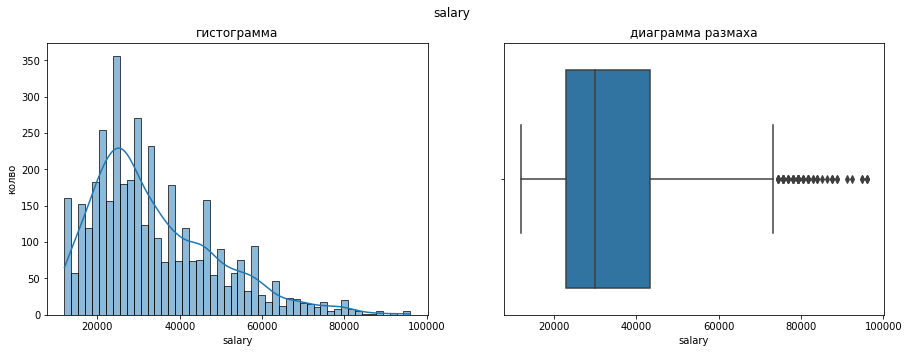

In [62]:
hist_box(train_2,'salary')

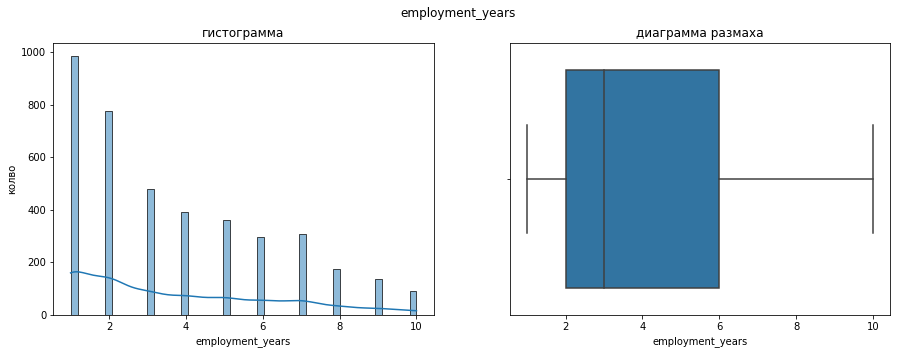

In [63]:
hist_box(train_2,'employment_years')

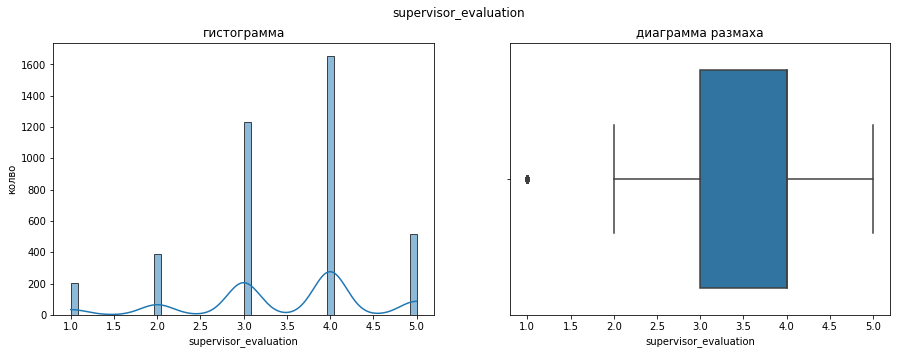

In [64]:
hist_box(train_2,'supervisor_evaluation')

test

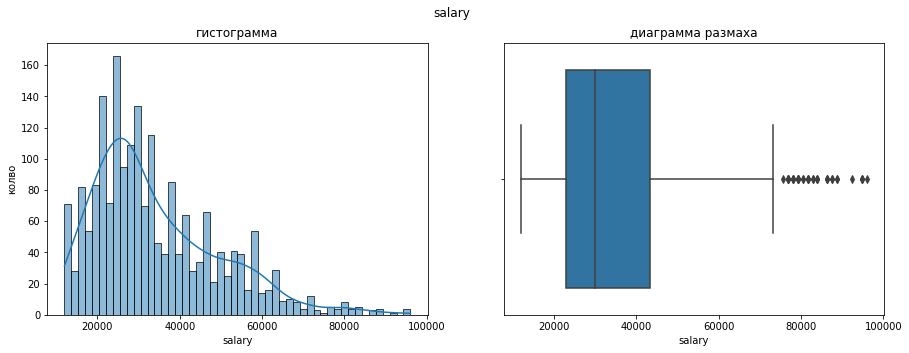

In [65]:
hist_box(X_test_2,'salary')

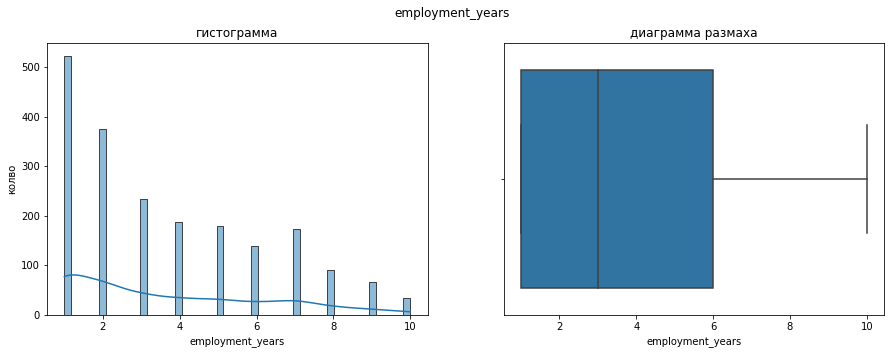

In [66]:
hist_box(X_test_2,'employment_years')

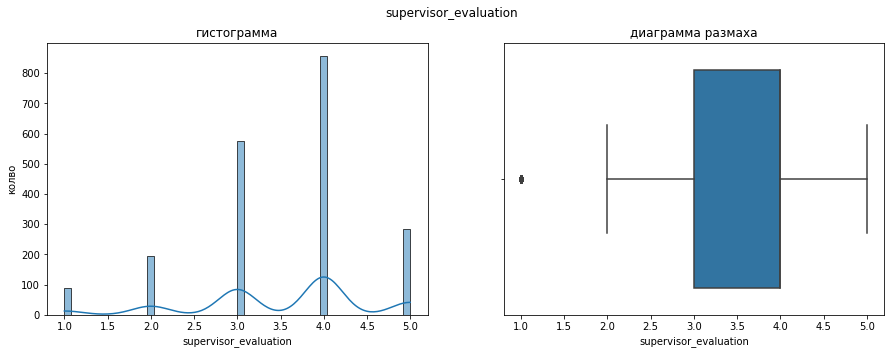

In [67]:
hist_box(X_test_2,'supervisor_evaluation')

Все графики и данные аналогичны данным из задачи 1: 
зарплата нормальное распределение скошенное справа

руководители оценивают работу сотрудника на 4 из 5

большинство уходят из компании, проработав год

большинство получают зп 23000-450000, зарплату более 7500 получают немногие





<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

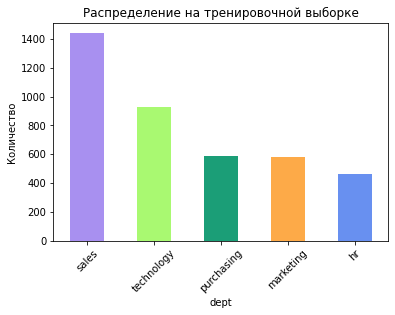

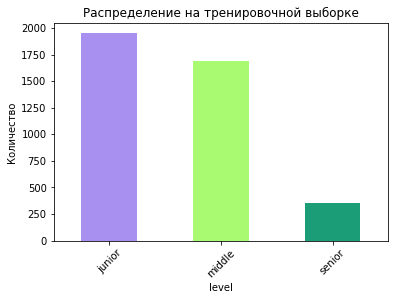

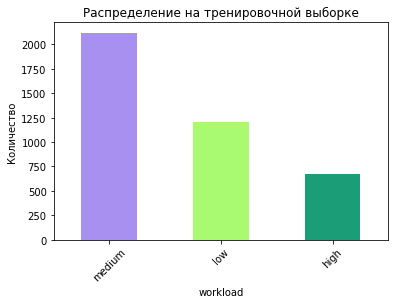

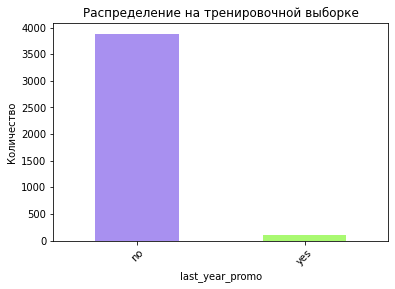

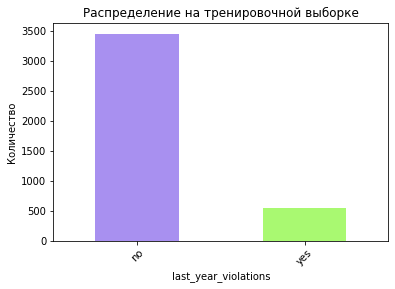

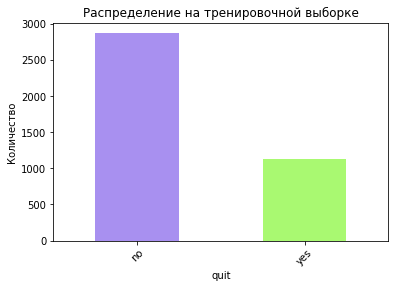

In [68]:
# графики для категориальных признаков

for col in cat_cols_train:
    fig, ax = plt.subplots()
    colors = [ '#A890F0', '#a9f971','#1b9e77', '#fdaa48','#6890F0']
    train_2[col].value_counts().plot.bar(color=colors, ax=ax);
    plt.title('Распределение на тренировочной выборке')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.show()
    

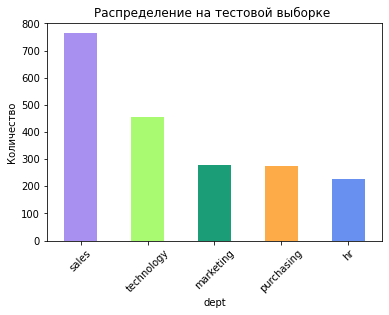

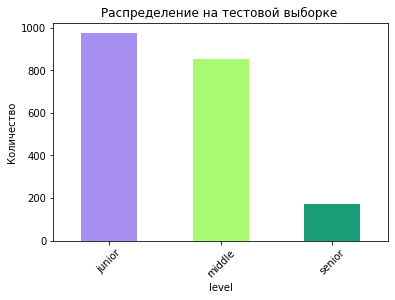

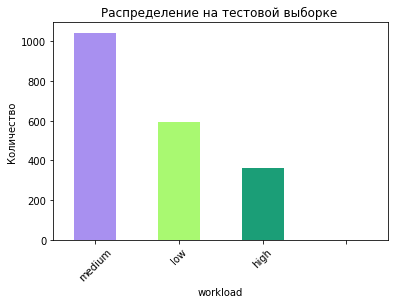

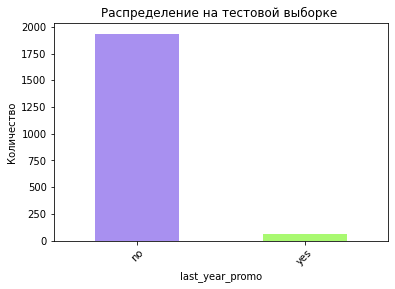

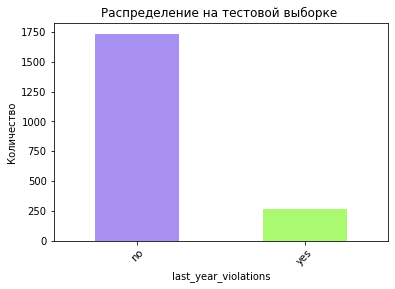

In [69]:
for col in cat_cols_test:
    fig, ax = plt.subplots()
    colors = [ '#A890F0', '#a9f971','#1b9e77', '#fdaa48','#6890F0']
    X_test_2[col].value_counts().plot.bar(color=colors, ax=ax);
    plt.title('Распределение на тестовой выборке ')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.show()
    

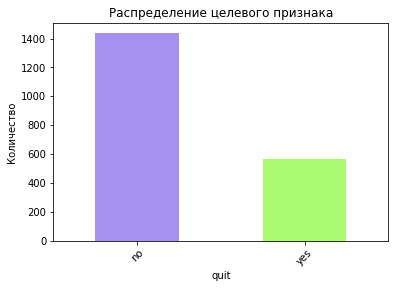

In [70]:
fig, ax = plt.subplots()
colors = [ '#A890F0', '#a9f971','#1b9e77', '#fdaa48','#6890F0']
y_test_2['quit'].value_counts().plot.bar(color=colors, ax=ax);
plt.title('Распределение целевого признака')
plt.xlabel('quit')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

In [71]:
 X_test_2['last_year_promo'].value_counts()

no     1937
yes      63
Name: last_year_promo, dtype: int64

Я построила графики распределения для категориальных признаков тестовой и тренирочной выборок. Данные схожи с данными первой задачи. Есть сходство и между тренировочными и тестовыми данными.

На графиках по отделам видим, что большинство работают в продажах, а меньше всего сотрудников HR.

Распределение уровня должности: больше всего джунов, а сеньоры составяляют примерно одну десятую от общего кол-ва сотрудников.

Также чаще всего сотрудники имеют среднюю нагрузку, высокая нагрузка у меньшинства.

На тренировочной выборке сотрудники реже получали повышение (примерно 2,8%) на тренировочной это около 3,1%.

Гораздо чаще чем получение повышение сотрудники совершали нарушения)Около 12% сотрудников в обоих наборах данных совершили нарушение.

Распределение целевого признака следующее: треть сотрудников планирует уйти. Это высокий показатель и несет серьезные риски компании.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Здесь тоже стоит написать небольшой вывод, а ниже, из расчета корреляции убрать id</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b>  исправлено.</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary']


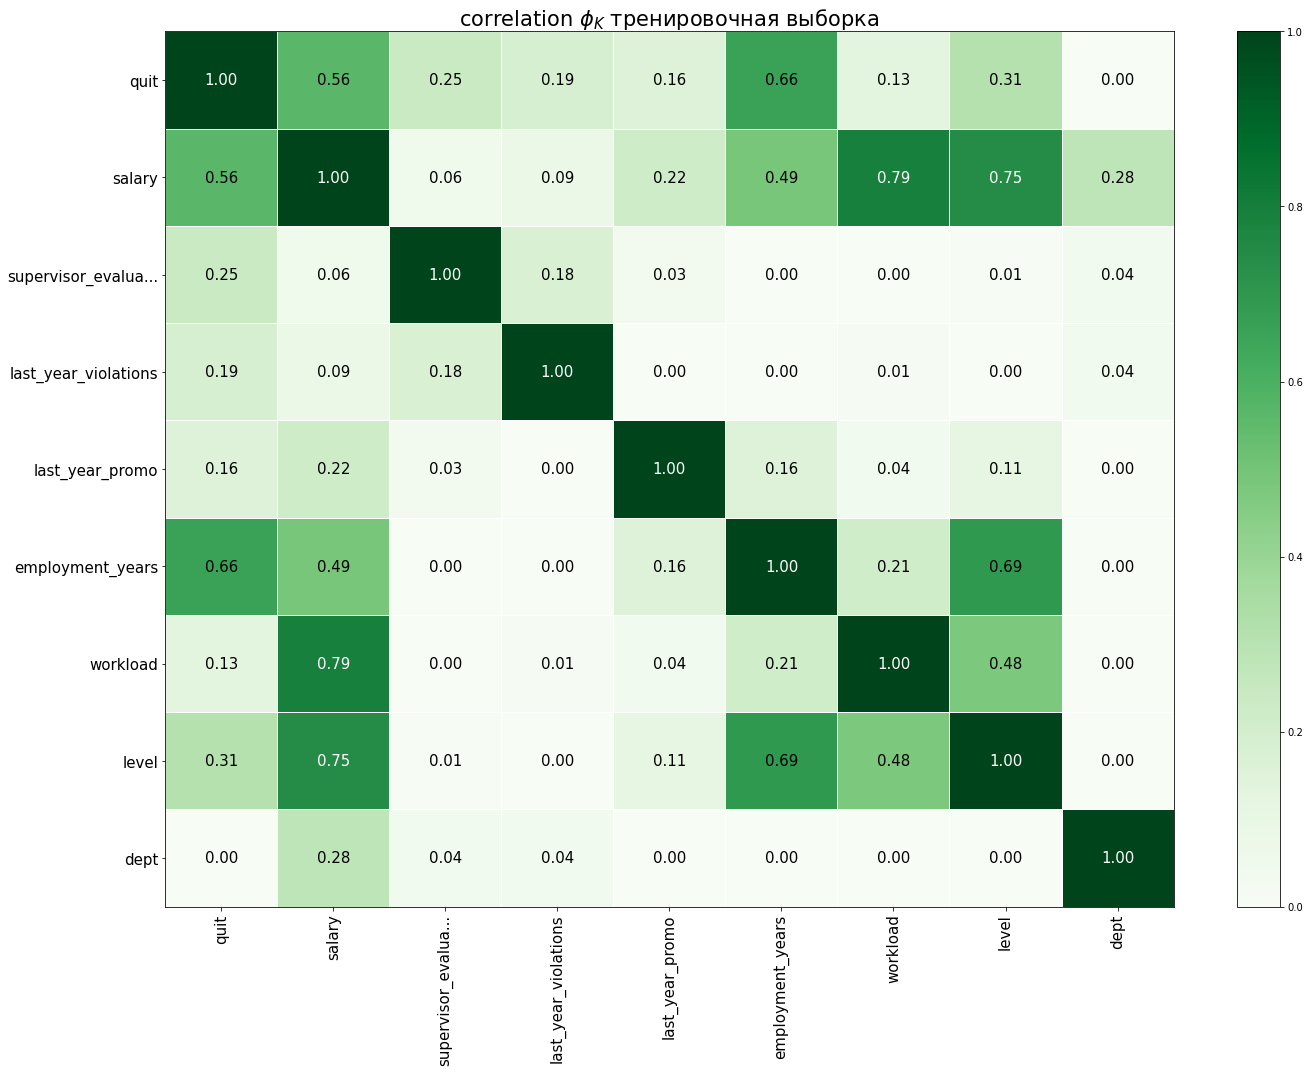

In [72]:
# проверим мультиколинеарность с помощью phik на тренировочных данных

# считаем корреляции на тренировочной выборке
phik_overview = phik_matrix(train_2.drop('id', axis=1))
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$ тренировочная выборка',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary']


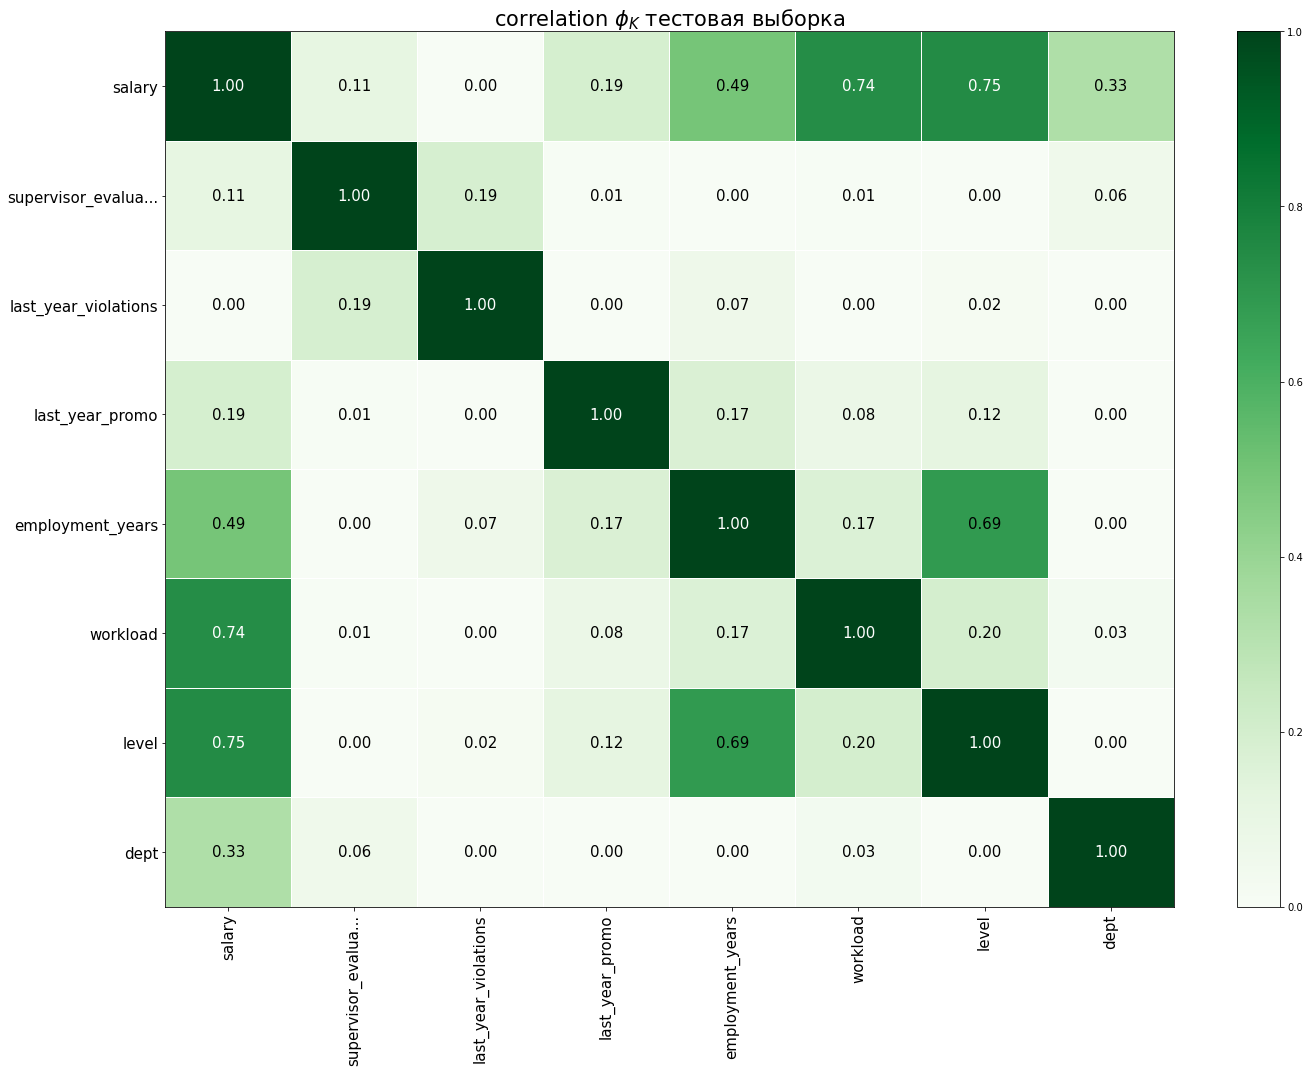

In [73]:
# проверим мультиколинеарность с помощью phik на тестовых данных

# считаем корреляции на тестовой выборке
phik_overview = phik_matrix(X_test_2.drop('id', axis=1))
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$ тестовая выборка',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

вывод:

в целом по всем графикам ситуации с тестовой и тренировочной выборками похожи:

зарплата имеет нормальное распределение скошенное вправо, большинство сотрудников работают год, руководитель хорошо оценивает работу сотрудника.

По категориальным признакам: больше всего сотрудников в продажах, джунов, со средней загрузкой.

Крайне мало сотрудников получали повышение в прошлом году, нарушение тд тоже происходит нечасто.

С помощью phik- матрицы я проверила данные на мультиколинеарность, она не была обнаружена. Нет связи более 0.9

Самая сильная связь (0.75) между зарплатой и уровнем должности.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Шаг 4. Добавление нового входного признака

In [74]:
#добавление в тестовую выборку целевого признака из предыдущей задачи
X_test_2['job_satisfaction_rate'] = y_test
train_2['job_satisfaction_rate'] = y_train

# проверим
X_test_2

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,100298,hr,junior,low,2,no,no,4,19200,0.80
1,100480,marketing,junior,low,4,no,no,4,16800,0.84
2,100503,purchasing,middle,high,5,no,no,4,55200,0.79
3,100610,sales,middle,medium,5,no,no,4,43200,0.75
4,100692,sales,middle,high,6,no,no,4,48000,0.69
...,...,...,...,...,...,...,...,...,...,...
1995,997290,sales,senior,medium,7,no,no,4,58800,0.79
1996,998548,marketing,junior,medium,2,no,no,4,32400,0.76
1997,998762,technology,junior,low,3,no,no,3,22800,0.48
1998,998900,marketing,middle,medium,7,no,no,3,45600,0.57


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Шаг 5. Подготовка данных

In [75]:
ohe_columns = ['dept', 'last_year_promo',  'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['supervisor_evaluation', 'employment_years', 'salary', 'job_satisfaction_rate']


In [76]:
# создание тренировочной выборки входных признаков и целевого признака
X_train = train_2.drop(['quit'], axis = 1)
y_train = train_2[['id','quit']]
X_test_2 = X_test_2.drop('id', axis=1)
y_test_2 = y_test_2['quit']
# создание тренировочной выборки входных признаков и целевого признака


In [77]:
y_train

,id,quit
0,723290,no
1,814010,no
2,155091,no
3,257132,yes
4,910140,no
...,...,...
3995,588809,no
3996,672059,no
3997,536432,yes
3998,692133,no


In [78]:
# удалим строки с пропусками в столбце job_satisfaction_rate
X_train = X_train[X_train['job_satisfaction_rate'].notna()]

X_train['id'].shape

(3755,)

У нас остается 3755 строк  в тренировочной выборке

In [79]:
# запишем ид клиентов с непустым job_satisfaction_rate
id_train = X_train['id']
# удалим ид из x_test, так как будет мешать обучению
X_train = X_train.drop(['id'], axis = 1)


In [80]:
# приведем y_train в соответствие x_train
y_train = y_train[y_train['id'].isin(id_train)]
# удалим ид из y_train
y_train = y_train.drop(['id'], axis = 1)

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Обучение

In [81]:
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])

In [82]:
param_distributions = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]   
    },
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'models__max_features': range(2, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__C': range(1, 10),
        'models__kernel': ['rbf', 'linear', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),  'passthrough']  

    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),  'passthrough']  
    }
] 

In [83]:
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test_2)
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions, 
    scoring='roc_auc', 
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train_enc)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['last_year_promo',
                                                                                'last_year_violations',
                                                                                'dept']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                SimpleIm...
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 10),
                                         'models__kernel': ['rbf', 'linear',
                                                            'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=42)],
                                         'models__C': range(1, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [84]:
print('Лучшая модель и её параметры:\n\n',randomized_search.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['last_year_promo',
                                                   'last_year_violations',
                                                   'dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy=

In [85]:
print ('Метрика roc-auc лучшей модели на тренировочной выборке:',randomized_search.best_score_)

Метрика roc-auc лучшей модели на тренировочной выборке: 0.9208675632725528


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Отличная метрика!
</div>

In [86]:
y_predict_proba = randomized_search.predict_proba(X_test_2)
y_pred = pd.DataFrame()
y_pred['прогноз'] = randomized_search.predict(X_test_2)

y_pred.columns

Index(['прогноз'], dtype='object')

In [87]:
print ('Метрика roc-auc лучшей модели на тестовой выборке:',roc_auc_score(y_test_2, y_predict_proba[:, 1]))

Метрика roc-auc лучшей модели на тестовой выборке: 0.9153912068590845


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

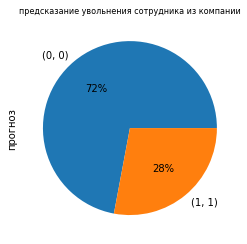

In [88]:
# круговая диаграмма с прогнозом
y_pred.groupby(['прогноз'])['прогноз'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('предсказание увольнения сотрудника из компании', fontsize= 8 )
plt.show()

По полученным данным видим, что 72% работников не собираются покидать компанию

Наилучшей моделью оказалась модель  DecisionTreeClassifier с параметрами: max_depth=6, max_features=9,random_state=42.

Метрика на тренирочных данных: 0.92, на тестовых 0.915 (подходит под требования задачи, >=0.91)

Я считаю, что модель себя хорошо проявила потому, что она используется, когда связь между набором переменных-предикторов и переменной отклика нелинейна, что подходит под наш набор данных.

На этом шаге мы просмотрели работу ряда моделей, а именно: KNeighborsClassifier, DecisionTreeClassifier,SVC,LogisticRegression.

Перебор гиперпараметров осуществлялся через RandomizedSearchCV.

* KNeighborsClassifier: Гиперпараметр n_neighbors был перебран в диапазоне от 1 до 20. Для масштабирования признаков использовались 2 метода: StandardScaler, MinMaxScaler.

* DecisionTreeClassifier: Гиперпараметры max_depth и max_features перебирались в диапазоне от 2 до 11. Методы масштабирования аналогичны предыдущей модели.

* SVC: Гиперпараметры C в диапазоне от 1 до 10, kernel': ['rbf', 'linear', 'sigmoid']. Методы масштабирования аналогичны предыдущей модели.

* LogisticRegression: Для этой модели перебор шёл по параметру регуляризации C в диапазоне от 1 до 10.


<div class="alert alert-success">
<b>👍 Успех:</b> Отличная работа, модель обучена и достигнута нужная метрика!
</div>

Посмотрим на графики важности признаков, чтобы дать какие-либо рекомендации бизнесу

PermutationExplainer explainer: 201it [00:10,  1.78it/s]                         


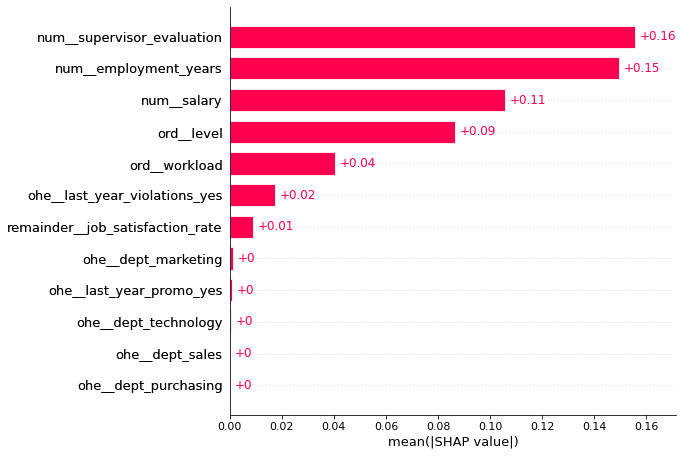

In [89]:
X_train_p = pd.DataFrame(randomized_search.best_estimator_.steps[0][1].fit_transform(X_train),
                        columns = randomized_search.best_estimator_.steps[0][1].get_feature_names_out())
X_test_p = pd.DataFrame(randomized_search.best_estimator_.steps[0][1].transform(X_test_2),
                        columns = randomized_search.best_estimator_.steps[0][1].get_feature_names_out())
model = randomized_search.best_estimator_.steps[1][1]
X_shap = X_test_p.sample(200)
explainer = shap.Explainer(model.predict, X_shap)
shape_values = explainer(X_shap)
shap.plots.bar(shape_values, max_display =16)

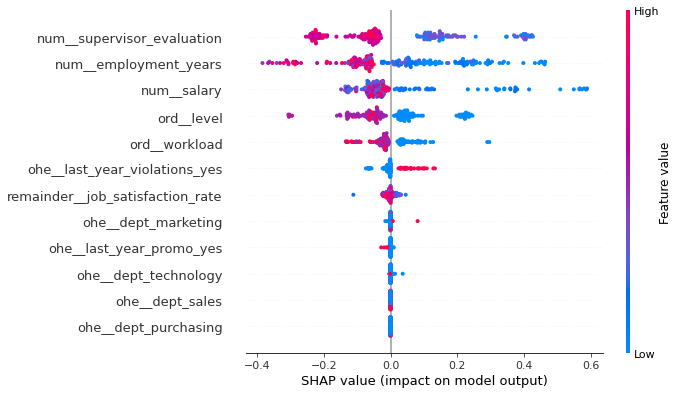

In [90]:
shap.plots.beeswarm(shape_values, max_display =16)

Для того чтобы определить то, какие признаки, в целом, являются наиболее важными для прогнозов, выдаваемых моделью, можно использовать столбчатую диаграмму (shap.plots.bar), отражающую результаты усреднения SHAP‑значений по всем наблюдениям.  Для расчёта средних берут значения Шепли по модулю, чтобы положительные и отрицательные значения не сводили друг друга к нулю.

Диаграмма shap.plots.beeswarm — это полезный инструмент, позволяющий визуализировать все SHAP‑значения для каждого признака. Диаграмма shap.plots.beeswarm может помочь в выявлении важных взаимоотношений между признаками и прогнозами модели.Исследуя SHAP‑значения на этой диаграмме, мы можем начать понимать природу взаимоотношений между признаками и прогнозом. Например, в случае с признаком "нарушение трудового договора за последний год", видно, что SHAP‑значения растут по мере роста значения признака. Это указывает на то, что более высокие значения признака соответствуют более высокой спрогнозированой вероятности уволиться.

Топ 3 важных признака: оценка руководителя, годы в компании, зарплата.


<div class="alert alert-success">
<b>👍 Успех:</b> Определена важность признаков, теперь можно дать HR какие то рекомендации!
</div>

In [91]:
# добавим к набору данным с фичами столбец с прогнозом увольнения
X_test_2['predict'] = y_pred
X_test_2

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,predict
0,hr,junior,low,2,no,no,4,19200,0.80,0
1,marketing,junior,low,4,no,no,4,16800,0.84,0
2,purchasing,middle,high,5,no,no,4,55200,0.79,0
3,sales,middle,medium,5,no,no,4,43200,0.75,0
4,sales,middle,high,6,no,no,4,48000,0.69,0
...,...,...,...,...,...,...,...,...,...,...
1995,sales,senior,medium,7,no,no,4,58800,0.79,0
1996,marketing,junior,medium,2,no,no,4,32400,0.76,0
1997,technology,junior,low,3,no,no,3,22800,0.48,1
1998,marketing,middle,medium,7,no,no,3,45600,0.57,0


Разобьем наш датасет на два для удобства построения графиков. Первый набор - сотрудник с прогнозом 0, который планирует работать в компании, второй набор - назовем его control- есть риск, что сотрудник примет решение продолжить карьеру вне компании

In [92]:
# сотрудники не планируют увольнение
norm = X_test_2.query('predict==0')
norm.shape

(1441, 10)

In [93]:
# есть риск увольнения
control = X_test_2.query('predict==1')
control.shape

(559, 10)

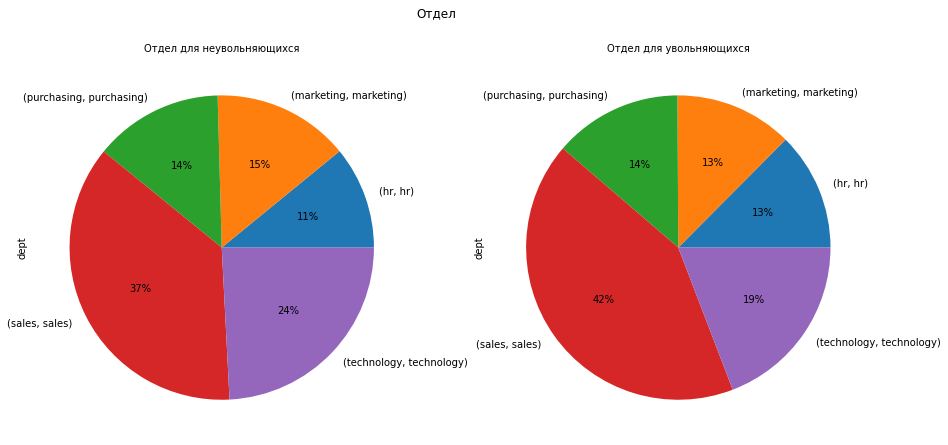

<Figure size 1080x1440 with 0 Axes>

In [94]:
plt.figure(figsize=[15, 7])
plt.suptitle('Отдел')
plt.subplot(1,2,1)
norm.groupby(['dept'])['dept'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Отдел для неувольняющихся', fontsize= 10 )
plt.subplot(1,2,2)
control.groupby(['dept'])['dept'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Отдел для увольняющихся', fontsize= 10 )
plt.figure(figsize=[15, 20])
plt.show();

 Продажи - самая крупная группа, к тому же высокий риск увольнения может быть связан  тем, что работа тяжелая, можно получить выгорание от постоянной коммуникации с другими людьми.

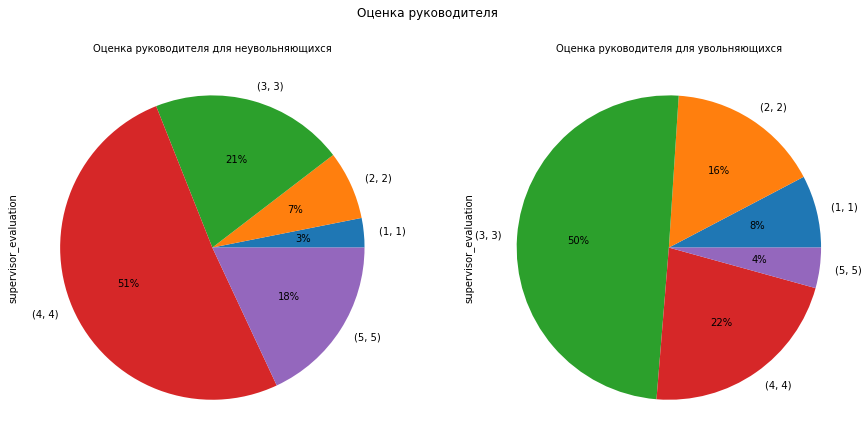

<Figure size 1080x1440 with 0 Axes>

In [95]:
plt.figure(figsize=[15, 7])
plt.suptitle('Оценка руководителя')
plt.subplot(1,2,1)
norm.groupby(['supervisor_evaluation'])['supervisor_evaluation'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Оценка руководителя для неувольняющихся', fontsize= 10 )
plt.subplot(1,2,2)
control.groupby(['supervisor_evaluation'])['supervisor_evaluation'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Оценка руководителя для увольняющихся', fontsize= 10 )
plt.figure(figsize=[15, 20])
plt.show();

Неувольняющиеся получают более лояльную обратную связь от руководителя (оценку 4), чем планирующие уволиться (оценка 3).

Также первая категория имеет больше отличных оценок руководителя (5% против 18%).

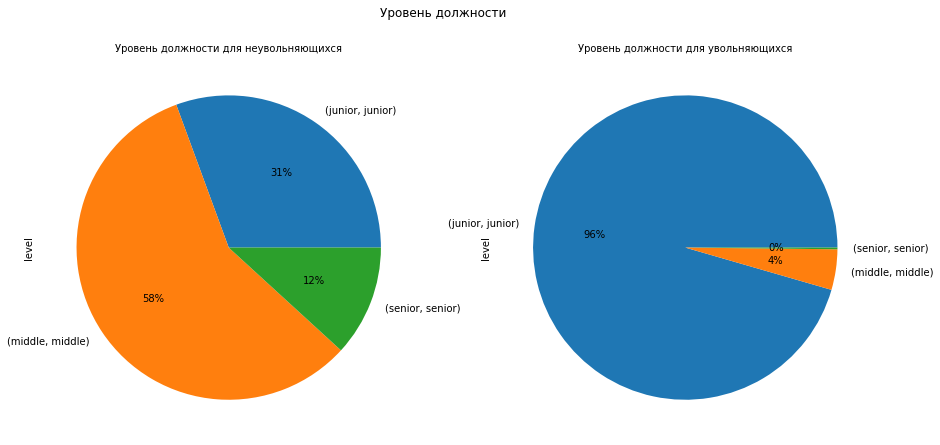

<Figure size 1080x1440 with 0 Axes>

In [96]:
plt.figure(figsize=[15, 7])
plt.suptitle('Уровень должности')
plt.subplot(1,2,1)
norm.groupby(['level'])['level'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Уровень должности для неувольняющихся', fontsize= 10 )
plt.subplot(1,2,2)
control.groupby(['level'])['level'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Уровень должности для увольняющихся', fontsize= 10 )
plt.figure(figsize=[15, 20])
plt.show();

Из зоны риска 96% джунов хотят уволиться, думаю, это может быть связано с тем, что они пришли на стажировку и поняли, что условия не подходит.

Также может быть объяснено отсутствием перспективы и невозможности карьерного роста.

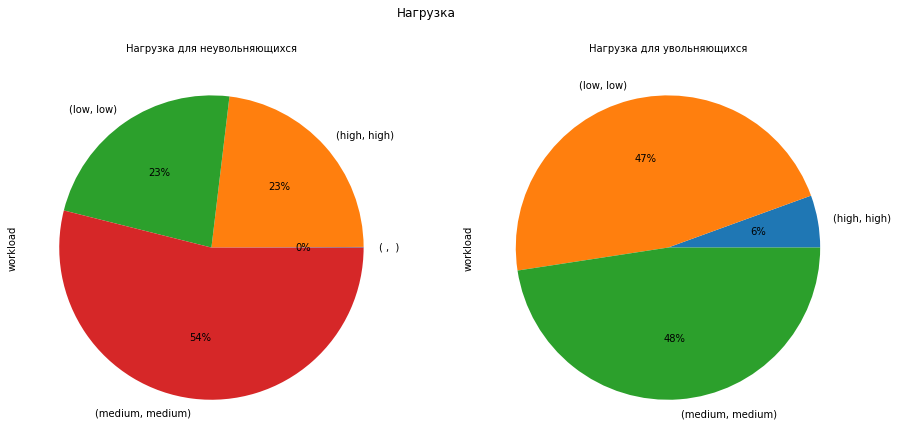

<Figure size 1080x1440 with 0 Axes>

In [97]:
plt.figure(figsize=[15, 7])
plt.suptitle('Нагрузка')
plt.subplot(1,2,1)
norm.groupby(['workload'])['workload'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Нагрузка для неувольняющихся', fontsize= 10 )
plt.subplot(1,2,2)
control.groupby(['workload'])['workload'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Нагрузка для увольняющихся', fontsize= 10 )
plt.figure(figsize=[15, 20])
plt.show();

ОЧень важно сохранять средний уровень нагрузки, чтобы сотрудник мог соблюдать ворк-лайф баланс. И как минимум быть свободным от рабочих чатов в отпуск и выходные.

Видим, что среди предсказанных к увольнению 47% имеют низкую загрузку. Может быть, они не ощущают в полной мере свою полезность в команде и стоит привлечь больше в командную деятельность.

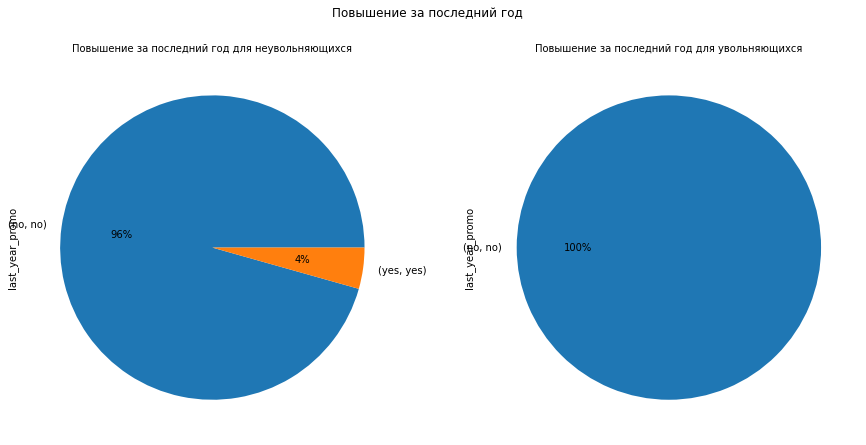

<Figure size 1080x1440 with 0 Axes>

In [98]:
plt.figure(figsize=[15, 7])
plt.suptitle('Повышение за последний год')
plt.subplot(1,2,1)
norm.groupby(['last_year_promo'])['last_year_promo'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Повышение за последний год для неувольняющихся', fontsize= 10 )
plt.subplot(1,2,2)
control.groupby(['last_year_promo'])['last_year_promo'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Повышение за последний год для увольняющихся', fontsize= 10 )
plt.figure(figsize=[15, 20])
plt.show();

Все сотрудники  с риском уволиться не получали повышений

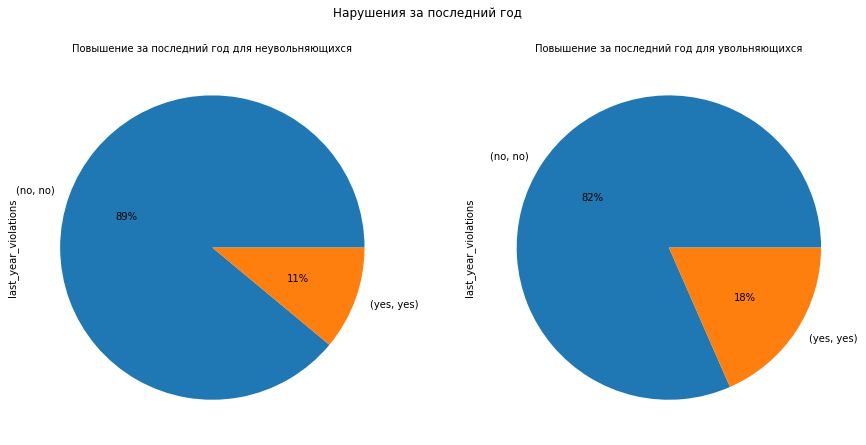

<Figure size 1080x1440 with 0 Axes>

In [99]:

plt.figure(figsize=[15, 7])
plt.suptitle('Нарушения за последний год')
plt.subplot(1,2,1)
norm.groupby(['last_year_violations'])['last_year_violations'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Повышение за последний год для неувольняющихся', fontsize= 10 )
plt.subplot(1,2,2)
control.groupby(['last_year_violations'])['last_year_violations'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Повышение за последний год для увольняющихся', fontsize= 10 )
plt.figure(figsize=[15, 20])
plt.show();

Во второй группе нарушавших ТД больше, чем в первой на 7%

По полученным данным мы смогли получить "портрет" сотрудника с высокими рисками увольнения:

это джун из отдела продаж с средней рабочей нагрузкой, не получавший повышения.

Возможно, стоит присмотреться к этой категории повнимательнее.

<div class="alert alert-success">
<b>👍 Успех:</b> Отличный портрет уходящего клиента!
</div>

## Вывод

fotdi
Для обоих задач я разделила данные на количественные, ранговые и категориальные.

В первой задаче использовались модели: Линейная регрессия, логистическая регрессия, дерево решений. Перебор гиперпарметров шел через GridSearch, а метрику мы использовали свою собственную. Лучшей оказалась DecisionTreeRegressor с параметрами: max_depth=20, min_samples_split=8, random_state=42.На тренировочных данных значение метрики равно 15.03, на тестовых - 13.59. Мы добились результата, удовлятворяющего условиям задачи.

Для второй задачи лучшая модель -   DecisionTreeClassifier с параметрами: max_depth=6, max_features=9,random_state=42.

Метрика roc-auc на тренирочных данных: 0.92, на тестовых 0.915 (подходит под требования задачи, >=0.91)

Признаки, имеющие большую важность для прогноза я нашла с помощью shap графиков:оценка руководителя, годы в компании, зарплата.



Рекомендации бизнесу:

большинство сотрудников уходят в первый год, значит безусловно важно пересмотреть программу онбординга. Чтобы адаптация прошла лучше, а условия были комфортными для продолжения карьеры.

Сотрудникам важно получать экологичную и конструктивную обратную связь, возможно, стоит ввести или сделать регулярными face-to-face встречи, где сотрудник и руководитель могут рассказать о наболевшем. Важно давать не только негативную обратную связь, но  и хвалить сотрудника за успехи.

Важно обеспечить участие сотрудника в командной жизни и чувствовать его вовлеченность. 

Следить за рынком и обеспечивать конкурентный уровень з/п согласно навыкам сотрудника.

ВВести индивидуальный план развития и с ростом навыков сотрудника должен расти и уровень должности.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Отличная работа, нужно в нескольких местах внести небольшие исправения по моим комментариям</s>
</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Отличная работа! Было очень приятно проверять твой проект!

Оставлю хороший учебник по ML:
+  https://academy.yandex.ru/handbook/ml

Немного новостей с мира DL(вдруг заинтересует):
+  https://habr.com/ru/company/ods/blog/686962/

Вот тут проходят всякие соревнования, можешь себя попробовать:
+  https://hacks-ai.ru/


Возможно, что нить пригодится:
+  https://arxiv.org/ftp/arxiv/papers/2201/2201.00650.pdf
+  https://github.com/slgero/testovoe


Курс от МФТИ математика для DS:

+  https://www.youtube.com/watch?v=xccjt6lOoow&list=PLk4h7dmY2eYHHTyfLyrl7HmP-H3mMAW08&index=1


Тут много соревнований/лекций:

+  https://ods.ai/

stepic NLP/CV:

+  https://stepik.org/course/54098/syllabus
+  https://stepik.org/course/50352/syllabus

Еще есть от ВШЭ:

+  https://www.youtube.com/watch?v=mwjQaNt8qxk&list=PLEwK9wdS5g0og-DcF1apxutSM0GDLHz_3&ab_channel=%D0%A4%D0%9A%D0%9D%D0%92%D0%A8%D0%AD%E2%80%94%D0%B4%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8F
+  https://github.com/hse-ds/iad-deep-learning

Удачи в следующих проектах!!!
</div>
